# TP1: Algoritmos de búsqueda en Torre de Hanoi.



### 1.¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)
### Performance

La performance está dada por haber llegado a la solución, es decir, colocar a todos los discos en la varilla objetivo en el menor tiempo posible. En este caso como el costo de cada nodo es el mismo (1 para cada movimiento), la solución óptima es la que menos costo tiene.

### Enviroment
El ambiente está dado por los discos y las varillas.

### Actuator
Asumiendo que el agente es un robot, el actuador puede ser una mano robótica que realiza los movimientos de los discos.

### Sensor
En la misma línea que el punto anterior, podría tratarse de una cámara y sensores de posición que posea el robot y para detectar donde están los discos y donde colocarlos (así como donde está situado el brazo, según el ángulo).

### 2.¿Cuáles son las propiedades del entorno de trabajo?

1. Totalmente observable: Una vez que están seteadas las varillas y los discos, lo único que puede cambiar es su posición respetando las reglas del juego.
2. Determinístico: dado un estado en el que se encuentra el agente, se sabe con certeza los siguientes estados posibles. Esto ocurre para todas las transiciones de estados.
3. Secuencial: ya que cada decisión presente puede afectar decisiones futuras.
4. Estatico: ya que el entorno no cambia (y tampoco el rendimiento) mientras el agente decide su proxima acción.
5. Discreto: ya que la cantidad de acciones que puede elegir es finita.
6. Agente individual: no hay otros agentes ejecutando acciones sobre los discos o las varas.


### 3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.

1. Estado: Un estado es una "foto" a cualquier combinacion de discos correctamente colocada entre las 3 varillas.
Por ejemplo, lo siguiente sería un estado:

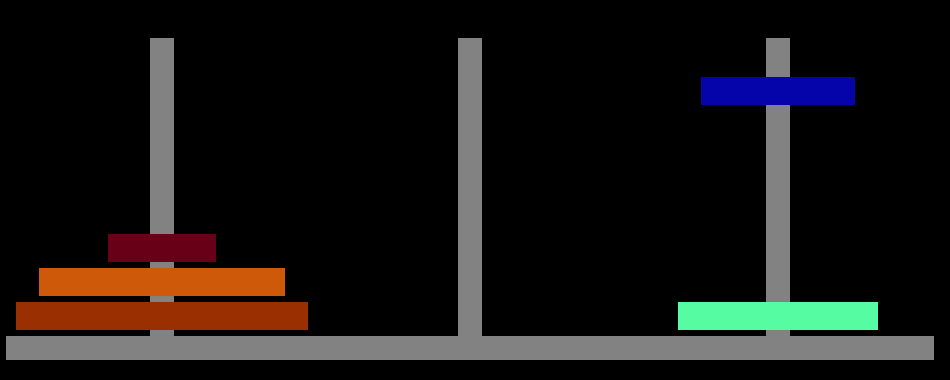

2. Espacio de estados: 
Está determinado por la cantidad de estados que hay. Si tomamos
k como el número de varillas y w como el número de discos, hay k^w = 3^5 = 243 estados.
Esto lo que termina formando es un grafo de estados. En el mismo pueden haber ciclos infinitos, es decir, transicionar de un estado a otro indefinidamente (por ejemplo, poner el disco 1 en una varilla e inmediatamente revetir ese paso y así sucesivamente).
Esto sería un grafo de estados para el problema de Hanoi con 3 varillas y 2 discos (que generan 3^2 = 9 estados) :

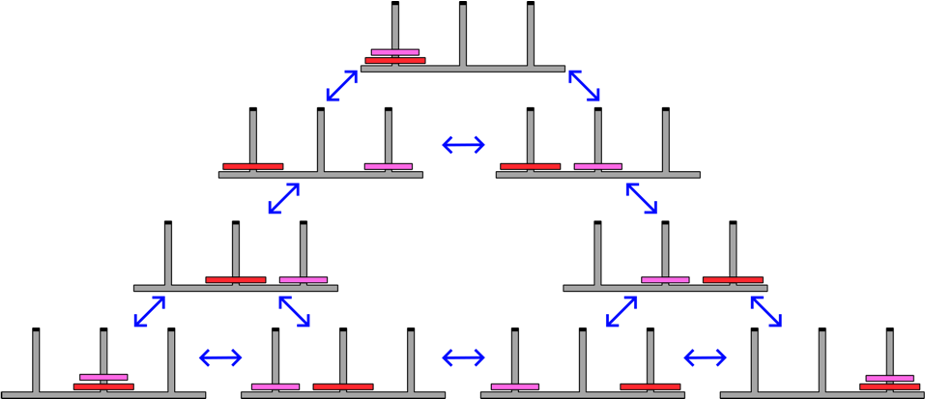


4. Árbol de búsqueda: Es el árbol b-ario que se forma cuando se realiza la búsqueda sobre el grafo de espacio de estados.

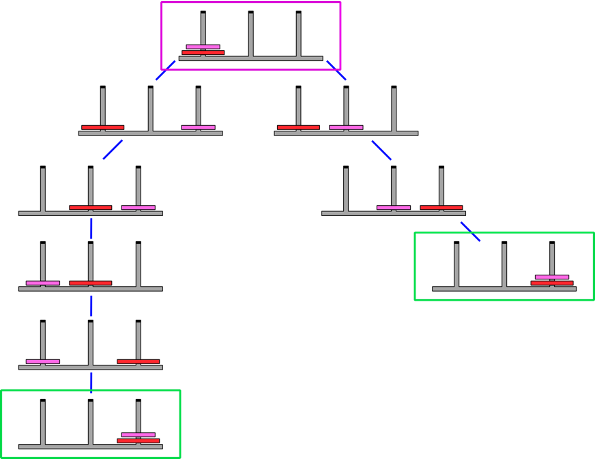

5. Nodo de busqueda: Cada nodo trae consigo un estado en el espacio de estados, posibles acciones y los costos asociados. Las aristas en el árbol de búsqueda corresponden a las acciones que nos llevarían al siguiente nodo.
6. Objetivo: El estado con 5 discos en la tercer varilla. 
7. Accion: Mover un disco a otra varilla con el costo de la transición que en este caso para todos es el mismo (costo=1).
8. Frontera: Dado un nodo explorado, son los nodos (inexplorados) siguientes a los cuales las acciones (desde el nodo explorado) nos podrían llevar.

### 4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.
El método de búsqueda implementado se trata de A*.
```python
initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)

problem = ProblemHanoi(initial=initial_state, goal=goal_state)
explored = set()

good_order = {tuple(range(5, 5 - (i + 1), -1)) for i in range(5)}

def h(new_node):
    rod_3 = new_node.state.rods[2]
    return -len(rod_3) if tuple(rod_3) in good_order else 0


def f(new_node):
    return new_node.path_cost + h(new_node)


pq = PriorityQueue(order='min', f=f)
pq.append(NodeHanoi(problem.initial))
nodes_used = []

while len(pq) != 0:
    node = pq.pop()
    explored.add(node.state)
    nodes_used.append(node)
    if problem.goal_test(node.state):
        last_node = node
        print("Encontramos la solución")
        break
    for next_node in node.expand(problem):
        if next_node.state not in explored:
            pq.append(next_node)
```

### 5. Complejidad algoritmica:


#### Calculo de f de A*
Veamos el calculo de f en la priority queue:
```python
good_order = {tuple(range(5, 5 - (i + 1), -1)) for i in range(5)}

def h(new_node):
    rod_3 = new_node.state.rods[2]
    return -len(rod_3) if tuple(rod_3) in good_order else 0

def f(new_node):
    return new_node.path_cost + h(new_node)
```
Debido a que good_order es un set con los discos en el orden correcto y debido a que está implementado 
con una hash table, consultar si un elemento esta es O(1). Luego, h(n) es de orden O(1).
g(n) es O(1) ya que es simplemente acceder al costo, que está almacenado en el objeto nodo.
f(n) por ende, es de O(1) tambien.

### Priority Queue complejidad

Veamos las características de la priority queue de heapq:
heappush: O(log(n))
heappop: O(log(n))

Sabiendo que el código de aima es:
```python
    def append(self, item):
        """Insert item at its correct position."""
        heapq.heappush(self.heap, (self.f(item), item))
    def pop(self):
        """Pop and return the item (with min or max f(x) value)
        depending on the order."""
        if self.heap:
            return heapq.heappop(self.heap)[1]
        else:
            raise Exception('Trying to pop from empty PriorityQueue.')
```
Por ende las líneas
```python
    node = pq.pop()
```
y 
```python
    pq.append(next_node)
```
Son de orden O(log(n)).
Donde n es la cantidad de nodos en la priority queue.

### Análisis del código principal

Ahora, sabiendo que agregamos una heurística consistente, estamos recortando varios posibles caminos malos y nos tendemos a extender por la solución óptima.

```python  
while len(pq) != 0:
    node = pq.pop() # O(log(n)) 
    explored.add(node.state) # O(1) ya que es un set y no van a haber colisiones
    if problem.goal_test(node.state): # check de goal test es O(1) tambien
        last_node = node
        print("Encontramos la solución")
        break
    for next_node in node.expand(problem): # esto en peor caso se extiende b veces
            if next_node.state not in explored: # este chequeo es O(1) ya que explored es un set
                pq.append(next_node) # esto es O(log(n))
```

Analizando de a niveles para el peor caso:

h=0
$$
0 (pop) + log(n) (append)
$$
h=1
$$
log(n) (pop) + b \cdot log(n) (append)
$$
h=2 
$$ b\cdot log(n) (pop) + b^2 \cdot log(n) (append)
$$

Esto resulta en un orden 
$$
O(log(n) \cdot b^h)
$$
Teniendo en cuenta que en el peor caso n = b^h 
$$
O(log(b^h) \cdot b^h)
$$

Como los nodos que se recorren son los que se insertan en la cola de prioridad (consumiendo memoria), la complejidad de tiempo es la misma que la de memoria.

### Calculo de effective branching factor.
En el algoritmo de A* se suele caracterizar la complejidad mediante un effective branching factor llamado b*.
Esto es meramente una estimación para saber cuanto puede reducir la complejidad el hecho de agregar una cola de prioridad y heurística.
Como utilizamos A* con una heurística consistente se llega a la solución óptima.
El peor caso de complejidad es haber recorrido el árbol completo, es decir, O(b^h).
Sabemos que la solución óptima requiere de 2^k -1 movimentos siendo k el número de discos.
k = 5 =>  h = 31.
La cantidad de nodos es 256, por ende 
$$
N + 1 = (b^*)^{h+1} - 1
$$
$$
log_2(N+2) = log_2(b^*)\cdot(h+1)
$$
$$
\frac{log_2(N+2)}{h+1} =  log_2(b^*)
$$
$$
b^* = 1.189496356
$$
En donde b* sería nuestro effective branching factor. 

Complejidad tanto en tiempo como espacio es:
$$
O(log((b^{*})^h) \cdot (b^*)^h)
$$



Nótese que para BFS la complejidad era de b = 3 , y en este caso es b* = 1.1894.., lo cual muestra una amplia reducción al menos en términos exponenciales.
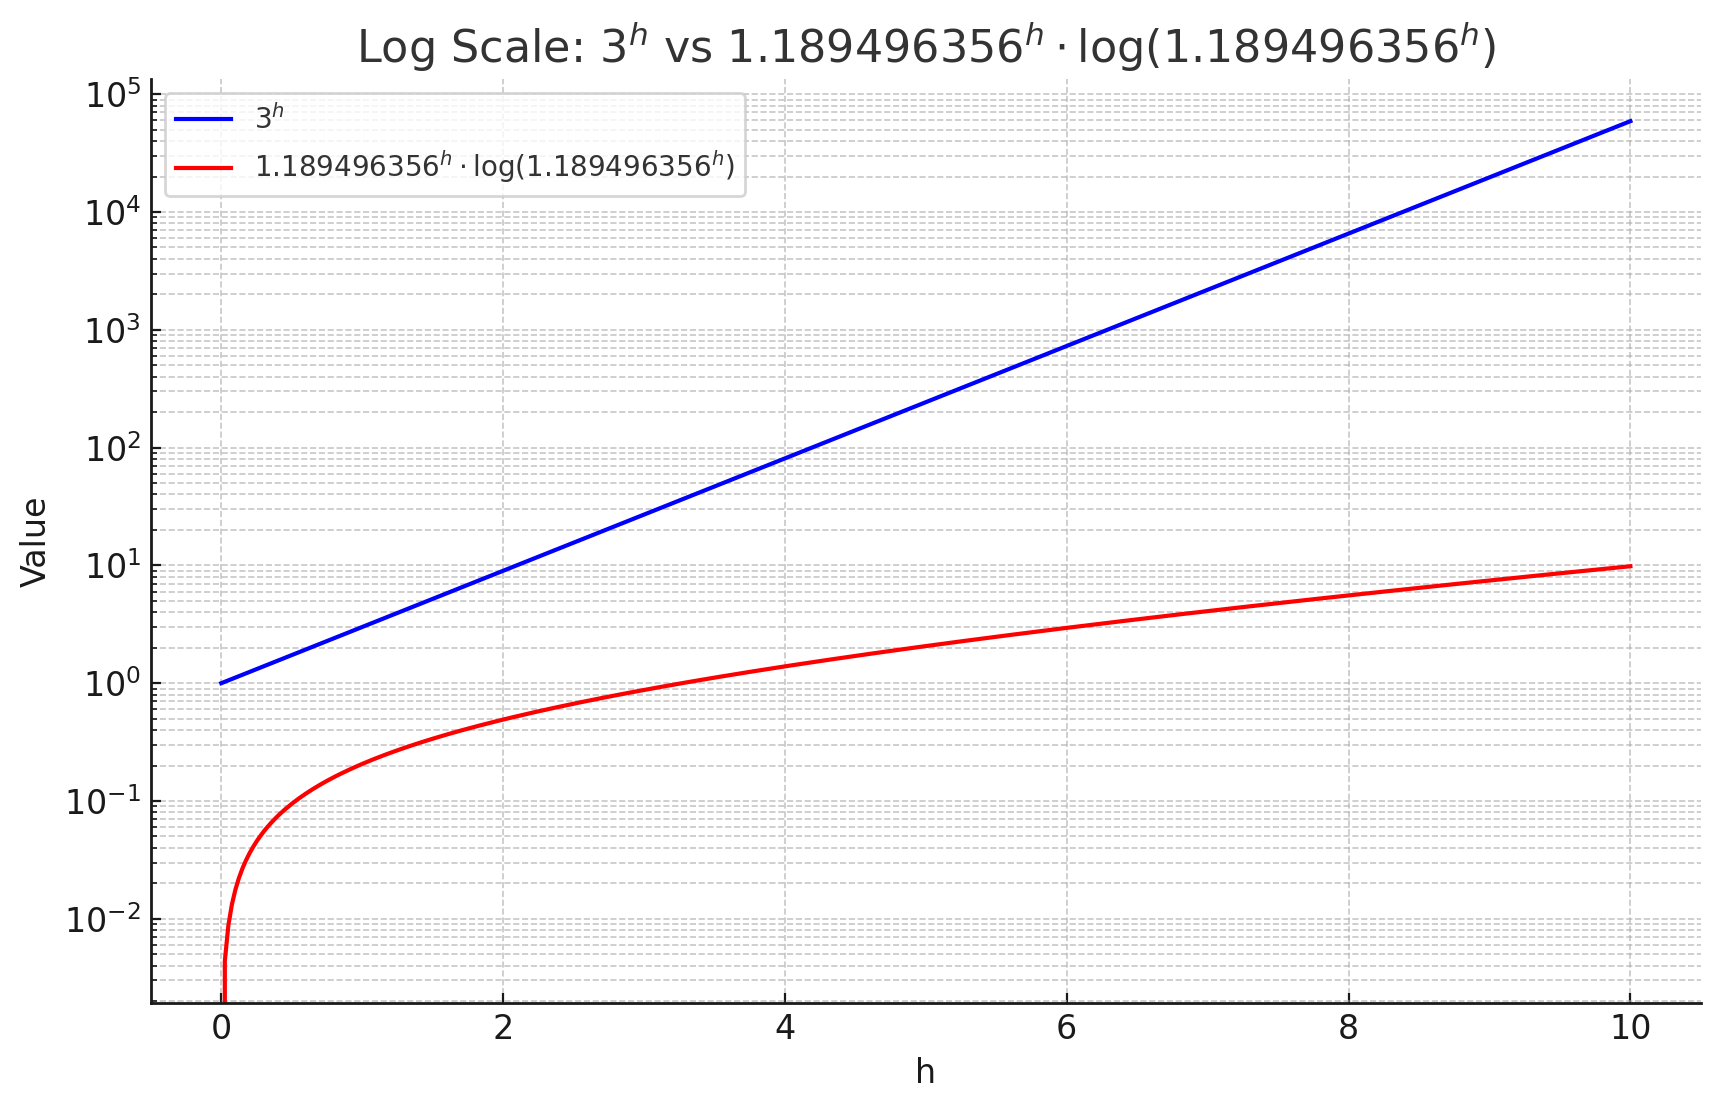


### 6.A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular promedio y desvío estándar de las métricas).

In [1]:
from aima import PriorityQueue
from hanoi_states import StatesHanoi, ProblemHanoi
from tree_hanoi import NodeHanoi
last_node = None

In [2]:
%%timeit
initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)

problem = ProblemHanoi(initial=initial_state, goal=goal_state)

frontier = [NodeHanoi(problem.initial)]
explored = set()

good_order = {tuple(range(5, 5 - (i + 1), -1)) for i in range(5)}

def h(new_node):
    rod_3 = new_node.state.rods[2]
    return -len(rod_3) if tuple(rod_3) in good_order else 0


def f(new_node):
    return new_node.path_cost + h(new_node)


pq = PriorityQueue(order='min', f=f)
pq.append(NodeHanoi(problem.initial))

while len(pq) != 0:
    node = pq.pop()
    explored.add(node.state)
    if problem.goal_test(node.state):
        last_node = node
        # print("Encontramos la solución")
        break
    for next_node in node.expand(problem):
        if next_node.state not in explored:
            pq.append(next_node)

17.6 ms ± 198 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
import tracemalloc

# Para medir memoria consumida (usamos el pico de memoria)
tracemalloc.start()

initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)

problem = ProblemHanoi(initial=initial_state, goal=goal_state)

frontier = [NodeHanoi(problem.initial)]
explored = set()

good_order = {tuple(range(5, 5 - (i + 1), -1)) for i in range(5)}

def h(new_node):
    rod_3 = new_node.state.rods[2]
    return -len(rod_3) if tuple(rod_3) in good_order else 0


def f(new_node):
    return new_node.path_cost + h(new_node)


pq = PriorityQueue(order='min', f=f)
pq.append(NodeHanoi(problem.initial))

while len(pq) != 0:
    node = pq.pop()
    explored.add(node.state)
    if problem.goal_test(node.state):
        last_node = node
        # print("Encontramos la solución")
        break
    for next_node in node.expand(problem):
        if next_node.state not in explored:
            pq.append(next_node)
            
_, memory_peak = tracemalloc.get_traced_memory()
memory_peak /= 1024*1024
tracemalloc.stop()

print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )

Maxima memoria ocupada: 0.23 [MB]


### 7. Si la solución óptima es movimientos con k igual al número de discos. Qué tan lejos está la solución del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de trayecto usado).

Como se trata de A* con una heurística consistente, la solución implementada converge a la solución óptima, por ende, no hay diferencias con la misma.

In [21]:
node = last_node
path = [last_node.state]
while node.parent is not None:
    node = node.parent
    path.append(node.state)

for p in path[::-1]:
    print(p)
nodes_cnt = len(path)
transitions = nodes_cnt - 1
print(f'Cantidad de movimientos: {transitions}')

HanoiState: 5 4 3 2 1 |  | 
HanoiState: 5 4 3 2 |  | 1
HanoiState: 5 4 3 | 2 | 1
HanoiState: 5 4 3 | 2 1 | 
HanoiState: 5 4 | 2 1 | 3
HanoiState: 5 4 1 | 2 | 3
HanoiState: 5 4 1 |  | 3 2
HanoiState: 5 4 |  | 3 2 1
HanoiState: 5 | 4 | 3 2 1
HanoiState: 5 | 4 1 | 3 2
HanoiState: 5 2 | 4 1 | 3
HanoiState: 5 2 1 | 4 | 3
HanoiState: 5 2 1 | 4 3 | 
HanoiState: 5 2 | 4 3 | 1
HanoiState: 5 | 4 3 2 | 1
HanoiState: 5 | 4 3 2 1 | 
HanoiState:  | 4 3 2 1 | 5
HanoiState: 1 | 4 3 2 | 5
HanoiState: 1 | 4 3 | 5 2
HanoiState:  | 4 3 | 5 2 1
HanoiState: 3 | 4 | 5 2 1
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 | 2 1 | 5 4
HanoiState:  | 2 1 | 5 4 3
HanoiState: 1 | 2 | 5 4 3
HanoiState: 1 |  | 5 4 3 2
HanoiState:  |  | 5 4 3 2 1
Cantidad de movimientos: 31


In [8]:
# generamos en el simulador los json que al ir a la carpeta simulator en el repo, 
# y cambiando los initial_state y sequence, 
# nos genera la animacion en pygame de como se acomodan los discos
last_node.generate_solution_for_simulator()

In [5]:
print(last_node)

<Node HanoiState:  |  | 5 4 3 2 1>
